# ObsID : 0827220701, SRCNUM : 1, Instru : EMOS2

Second previous observation of the source **0945070132 - 1**.

## ESASky

https://sky.esa.int/esasky/?target=53.383375%20-27.15480555555556&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``GAIA``

- Designation : Gaia DR3 5084568549147089792
- RA : 03h 33m 31.933s
- DEC : -27° 09' 16.53"
- Parallax : 0.1954 mas
- G : 19.7505
- BP-RP = 0.8773

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob("P*M2*SRSPEC0001.FTZ")[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: P0827220701M2S002SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.958e-01 +/- 2.552e-03 (96.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-100
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 3.114e+04 sec
 Using fit statistic: chi
 Using Background File                P0827220701M2S002BGSPEC0001.FTZ
  Background Exposure Time: 3.114e+04 sec
 Using Response (RMF) File            m2_e13_im_pall_o.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0827220701M2S002SRCARF0001.FTZ



In [4]:
print(f"Number of counts = {1.958e-01*3.114e+04} cts")

Number of counts = 6097.212 cts


The number of counts exceeds 100 cts, indicating that the chi-squared test should be a good choice for a goodness-of-fit statistic.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (100) ignored in spectrum #     1



(-0.5, 856.5, 656.5, -0.5)

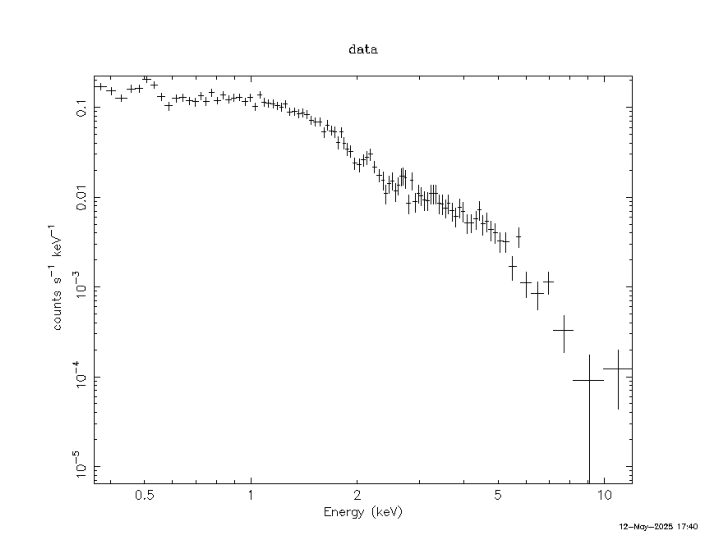

In [6]:
img = plt.imread(glob.glob('*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              6.670740e+11     using 99 bins.

Te

### Bremsstrahlung model

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.080918e+10     using 99 bins.

Test statistic : Chi-Squared              1.080918e+10     using 99 bins.
 Null hypothesis probability of 0.000000e+00 with 96 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
3675.17      167.281      -3     0.0681025       17.9563   0.000136499
2059.12      2.17967e+06  -4     0.0240406       4.53680   0.000233614
866.687      1.84051e+06  -5    0.00259019       3.77987   0.000357119


### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              9.061347e+08     using 99 bins.

Test statistic : Chi-Squared              9.061347e+08     using 99 bins.
 Null hypothesis probability of 0.000000e+00 with 96 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
2405.91      178.114      -3      0.919498      0.915683   

### Powerlaw model

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.824250e+10     using 99 bins.

Test statistic : Chi-Squared              9.824250e+10     using 99 bins.
 Null hypothesis probability of 0.000000e+00 with 96 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
4521.01      186.269      -2     0.0911978      0.640581   3.58232e-05
3819.77      4.3797e+06   -3   0.000657984       1.30677   6.67219e-05
1754.55      4.34734e+06  -4   0.000114898       3.22012   0.00030613

### Black body + Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.244308e+12     using 99 bins.

Test statistic : Chi-Squared              1.244308e+12     using 99 bins.
 Null hypothesis probability of 0.000000e+00 with 94 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
4626.71      851168  

### Bremss + Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.701193e+11     using 99 bins.

Test statistic : Chi-Squared              1.701193e+11     using 99 bins.
 Null hypothesis probability of 0.000000e+00 with 94 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
4166.89      228150 

## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Black body + Powerlaw``: **2.0932e-12 ergs/cm^2/s**.

In [17]:
Flux_bp = 2.0932e-12 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Black body + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")

X-ray flux : 
Black body + Powerlaw : F_x-ray = 2.0932e-12 ergs/cm^2/s


### Optical flux

In [18]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.7505

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.3212630781247998e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [19]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Black body + Powerlaw : F_x-ray/F_optical = {Flux_bp/F}")

X-ray Flux / Optical Flux ratio : 
Black body + Powerlaw : F_x-ray/F_optical = 15.84241650777656


## Luminosity

In [20]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Black body + Powerlaw : L_x-ray = {Luminosity_bp} erg/s")

(GAIA)
Distance : d = 1.5791709314227227e+22 cm
Luminosity :
Black body + Powerlaw : L_x-ray = 6.559622884855864e+33 erg/s
